<a href="https://colab.research.google.com/github/ravidas07/DeepLearning/blob/main/HandWrittenCharacterClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hand Written Character Classification

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Import necessary libraries and package

In [2]:
import cv2 as cv
import numpy as np
import pandas as pd
from keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from keras.utils import to_categorical

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:
import pandas as pd


In [83]:
import zipfile
filterwarnings("ignore")

def unzip_file(zip_filepath, extract_dir):

  try:
    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
      zip_ref.extractall(extract_dir)
      print(f"Successfully unzipped '{zip_filepath}' to '{extract_dir}'")
  except FileNotFoundError:
      print(f"Error: File '{zip_filepath}' not found.")
  except zipfile.BadZipFile:
      print(f"Error: Invalid zip file '{zip_filepath}'.")

zip_file_path = "/content/A_Z Handwritten Data.csv.zip" #@param {type:"string"}
extract_directory = "/content/" #@param {type:"string"}
unzip_file(zip_file_path, extract_directory)


Successfully unzipped '/content/A_Z Handwritten Data.csv.zip' to '/content/'


### Loading Dataset

In [7]:
df = pd.read_csv("/content/A_Z Handwritten Data.csv")
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### basic Data Quality Checks

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [9]:
df.isnull().sum()

,0
0,0
0.1,0
0.2,0
0.3,0
0.4,0
...,...
0.644,0
0.645,0
0.646,0
0.647,0


In [10]:

df.shape

(372450, 785)

In [11]:
df.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


### Taking Only Values for using in CNN

In [12]:
dfv = df.values
dfv[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
dfv[0:,:1]

array([[ 0],
       [ 0],
       [ 0],
       ...,
       [25],
       [25],
       [25]])

### Spliting X and Y from dataset

In [14]:
X = dfv[:,1:]
Y = dfv[:,:1]

In [15]:
X.shape

(372450, 784)

In [16]:
Y.shape

(372450, 1)

### Applying train test split

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
import numpy as np
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28))

In [18]:
print(x_train.shape)
print(x_test.shape)


(297960, 28, 28)
(74490, 28, 28)


In [19]:
print(y_train.shape)
print(y_test.shape)

(297960, 1)
(74490, 1)


### Ploting number of Alphates in dataset

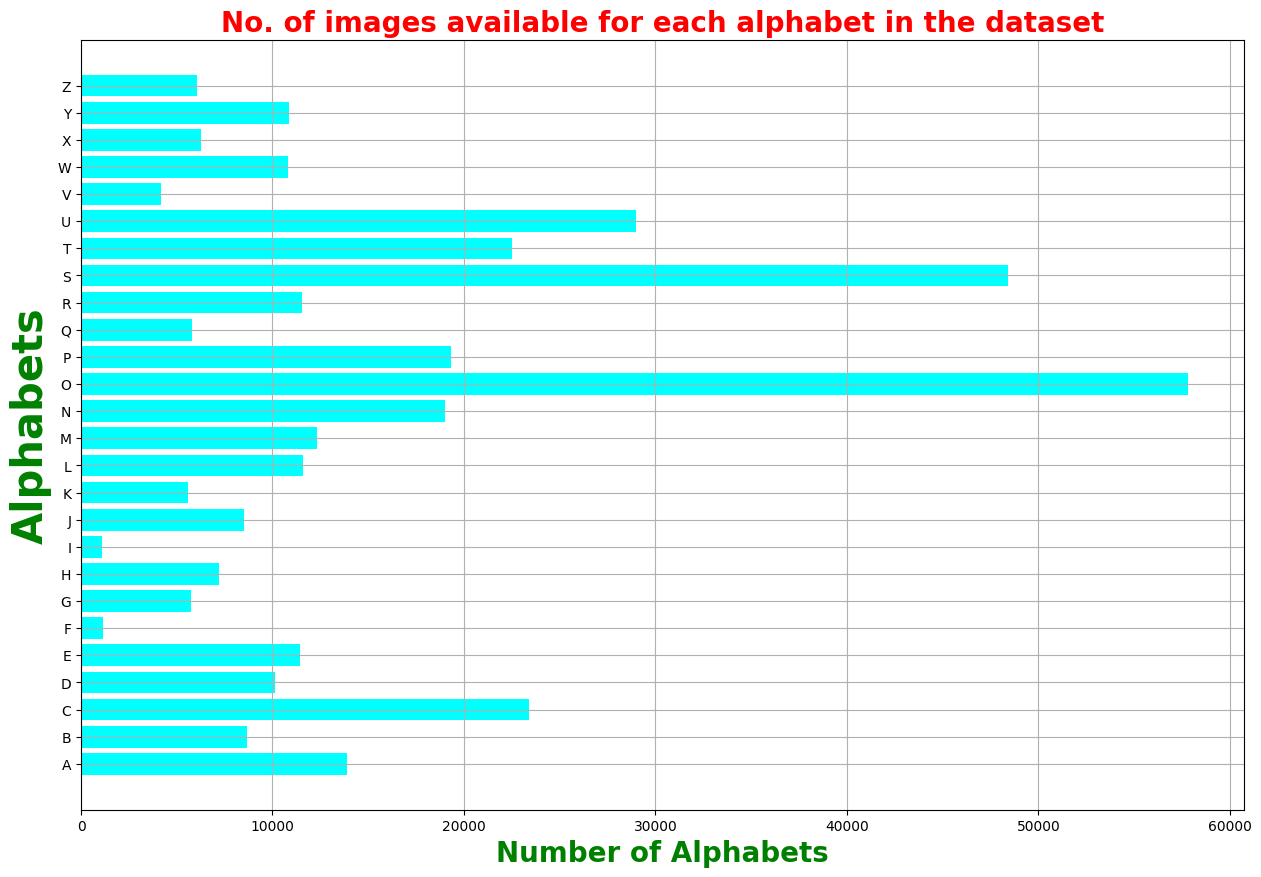

In [20]:
import matplotlib.pyplot as plt
count = np.zeros(26, dtype = 'int') #count list containing all zeroes

#counting each label
for i in Y:
    count[i] += 1

#creating a list of alphabets
alphabets = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

plt.figure(figsize=(15,10))
plt.barh(alphabets, count, color = "cyan")
plt.xlabel("Number of Alphabets",fontsize = 20, fontweight = 'bold',color = 'green')
plt.ylabel("Alphabets",fontsize = 30, fontweight = 'bold',color = 'green')
plt.title("No. of images available for each alphabet in the dataset", fontsize = 20, fontweight = 'bold', color = "red")
plt.grid()
plt.show()

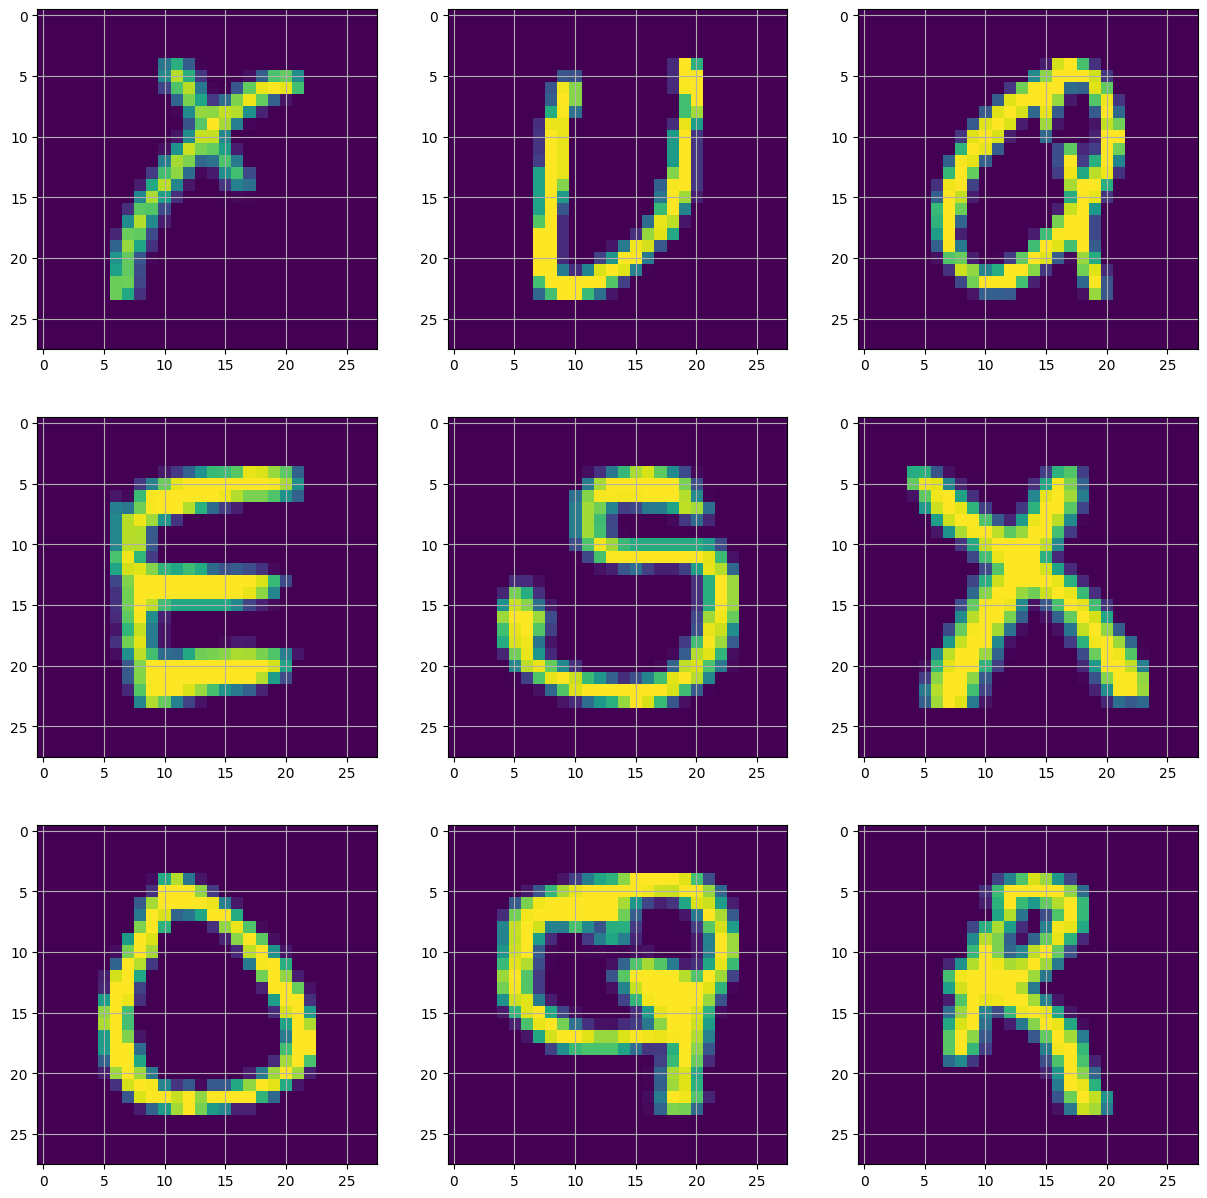

In [21]:
from sklearn.utils import shuffle
img_list = shuffle(x_train[:1000])
fig,ax = plt.subplots(3,3,figsize=(15,15))
axes = ax.flatten()
for i in range(9):
    axes[i].imshow(img_list[i])
    axes[i].grid()
plt.show()

### Reshaping and down sampling

In [22]:
x_train_scl = x_train/255
x_test_scl = x_test/255

In [23]:
x_train_scl = np.expand_dims(x_train_scl, axis=-1)
x_test_scl = np.expand_dims(x_test_scl, axis=-1)

In [24]:
print(x_train_scl.shape)
print(x_test_scl.shape)

(297960, 28, 28, 1)
(74490, 28, 28, 1)


In [25]:
y_train_pre = to_categorical(y_train, num_classes=26)
y_test_pre = to_categorical(y_test, num_classes=26)

In [26]:
y_train[0:5]

array([[ 1],
       [18],
       [ 1],
       [18],
       [18]])

In [27]:
y_train_pre[0:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [28]:
y_test_pre[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### CNN Model Architecture

In [29]:
model = Sequential()

# Add Conv2D layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Add Conv2D layer 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding=("same")))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Add Conv2D layer 3
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding=("valid")))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Add Dense layer 1
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))

# Add Dense layer 2
model.add(Dense(units=64, activation='relu'))

# Final Layer
model.add(Dense(units=26, activation='softmax'))



In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=10, verbose=1, mode = "min")
mc = ModelCheckpoint(filepath="best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode="max")

In [33]:
history = model.fit(x_train_scl, y_train_pre, epochs=100,callbacks=[es,mc], validation_data=(x_test_scl, y_test_pre))

Epoch 1/100
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9001 - loss: 0.3528
Epoch 1: val_accuracy improved from -inf to 0.98397, saving model to best_model.h5


9312/9312 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - accuracy: 0.9001 - loss: 0.3527 - val_accuracy: 0.9840 - val_loss: 0.0587
Epoch 2/100
9308/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9822 - loss: 0.0630
Epoch 2: val_accuracy improved from 0.98397 to 0.98594, saving model to best_model.h5


9312/9312 ━━━━━━━━━━━━━━━━━━━━ 74s 5ms/step - accuracy: 0.9822 - loss: 0.0630 - val_accuracy: 0.9859 - val_loss: 0.0512
Epoch 3/100
9297/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9871 - loss: 0.0475
Epoch 3: val_accuracy improved from 0.98594 to 0.98930, saving model to best_model.h5


9312/9312 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms/step - accuracy: 0.9871 - loss: 0.0475 - val_accuracy: 0.9893 - val_loss: 0.0404
Epoch 4/100
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9892 - loss: 0.0387
Epoch 4: val_accuracy improved from 0.98930 to 0.99101, saving model to best_model.h5


9312/9312 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.9892 - loss: 0.0387 - val_accuracy: 0.9910 - val_loss: 0.0360
Epoch 5/100
9306/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9909 - loss: 0.0323
Epoch 5: val_accuracy did not improve from 0.99101
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 0.9909 - loss: 0.0323 - val_accuracy: 0.9909 - val_loss: 0.0361
Epoch 6/100
9308/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9915 - loss: 0.0290
Epoch 6: val_accuracy did not improve from 0.99101
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms/step - accuracy: 0.9915 - loss: 0.0290 - val_accuracy: 0.9903 - val_loss: 0.0379
Epoch 7/100
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9922 - loss: 0.0279
Epoch 7: val_accuracy did not improve from 0.99101
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 0.9922 - loss: 0.0279 - val_accuracy: 0.9910 - val_loss: 0.0340
Epoch 8/100
9306/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9931 - loss: 0.0242
Epoch 8: va

9312/9312 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.9938 - loss: 0.0219 - val_accuracy: 0.9925 - val_loss: 0.0345
Epoch 11/100
9297/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9942 - loss: 0.0200
Epoch 11: val_accuracy did not improve from 0.99251
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.9942 - loss: 0.0200 - val_accuracy: 0.9922 - val_loss: 0.0339
Epoch 11: early stopping


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 504,848 (1.93 MB)

 Trainable params: 168,282 (657.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 336,566 (1.28 MB)

In [35]:
model.evaluate(x_test_scl, y_test_pre)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9919 - loss: 0.0343


[0.03387301415205002, 0.9921868443489075]

In [36]:
model.evaluate(x_train_scl, y_train_pre)

9312/9312 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9964 - loss: 0.0119


[0.01213885098695755, 0.9962881207466125]

### Find Accuracy and Loss of Model

In [37]:
print("The validation accuracy is :", history.history['val_accuracy'][-1])
print("The training accuracy is :", history.history['accuracy'][-1])
print("The validation loss is :", history.history['val_loss'][-1])
print("The training loss is :", history.history['loss'][-1])

The validation accuracy is : 0.9921868443489075
The training accuracy is : 0.9939488768577576
The validation loss is : 0.03387301415205002
The training loss is : 0.021305935457348824


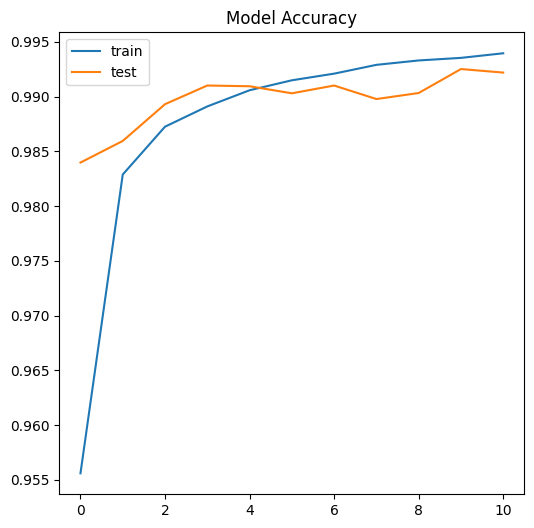

In [41]:
plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.title("Model Accuracy")
plt.show()

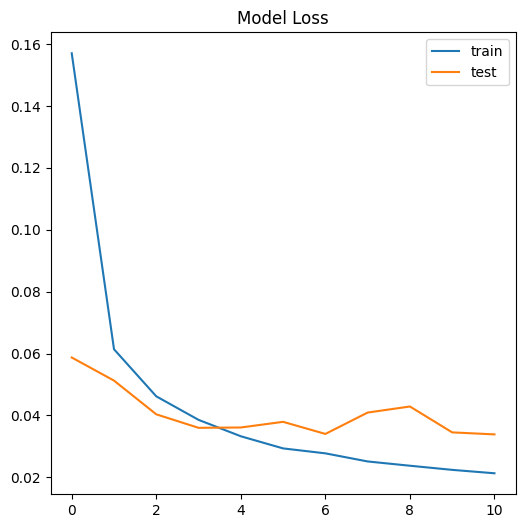

In [42]:
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Model Loss")
plt.show()

In [43]:
yprob_train = model.predict(x_train_scl)
yprob_test = model.predict(x_test_scl)

9312/9312 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [44]:
yprob_test[0]

array([1.07083412e-33, 0.00000000e+00, 1.67503490e-24, 2.81054902e-35,
       2.80259693e-45, 0.00000000e+00, 1.24603039e-39, 1.60938348e-26,
       4.48415509e-44, 7.90374933e-37, 1.02951265e-33, 1.62481548e-36,
       1.00000000e+00, 4.62374843e-12, 2.55217597e-31, 2.94805731e-37,
       0.00000000e+00, 8.36583813e-31, 1.45503397e-25, 2.80820717e-24,
       6.10740455e-22, 0.00000000e+00, 2.73027465e-30, 2.96242867e-31,
       0.00000000e+00, 2.80259693e-44], dtype=float32)

### Prediction on test data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


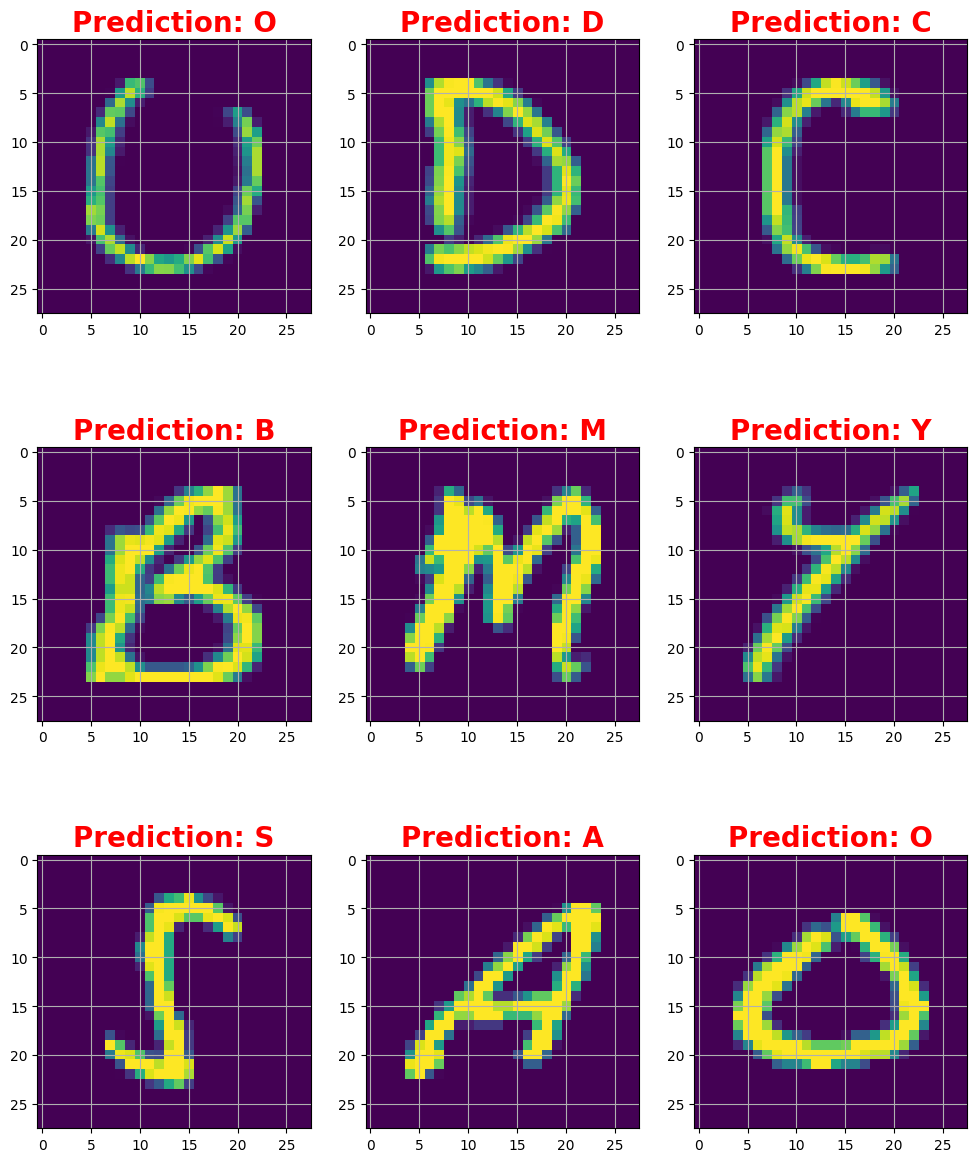

In [51]:
dict_word = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

img_list_test = shuffle(x_test[:1000])
fig, axes = plt.subplots(3, 3, figsize = (12, 15))
axes = axes.flatten()

for i in range(9):
    img = np.reshape(x_test[i], (28, 28))
    axes[i].imshow(img_list_test[i])

    pred = dict_word[np.argmax(model.predict(np.reshape(img_list_test[i],(1,28,28,1))))]
    axes[i].set_title("Prediction: " + pred, fontsize = 20, fontweight = 'bold', color = 'red')
    axes[i].grid()

In [52]:
def predict_label(model, x):
    yprob = model.predict(x)
    y_pred = yprob.argmax(axis=1)
    max_prob = yprob.max(axis=1)
    return y_pred, max_prob

In [54]:
ypred_train, yprob_train = predict_label(model, x_train_scl)
ypred_test, yprob_test = predict_label(model, x_test_scl)

9312/9312 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


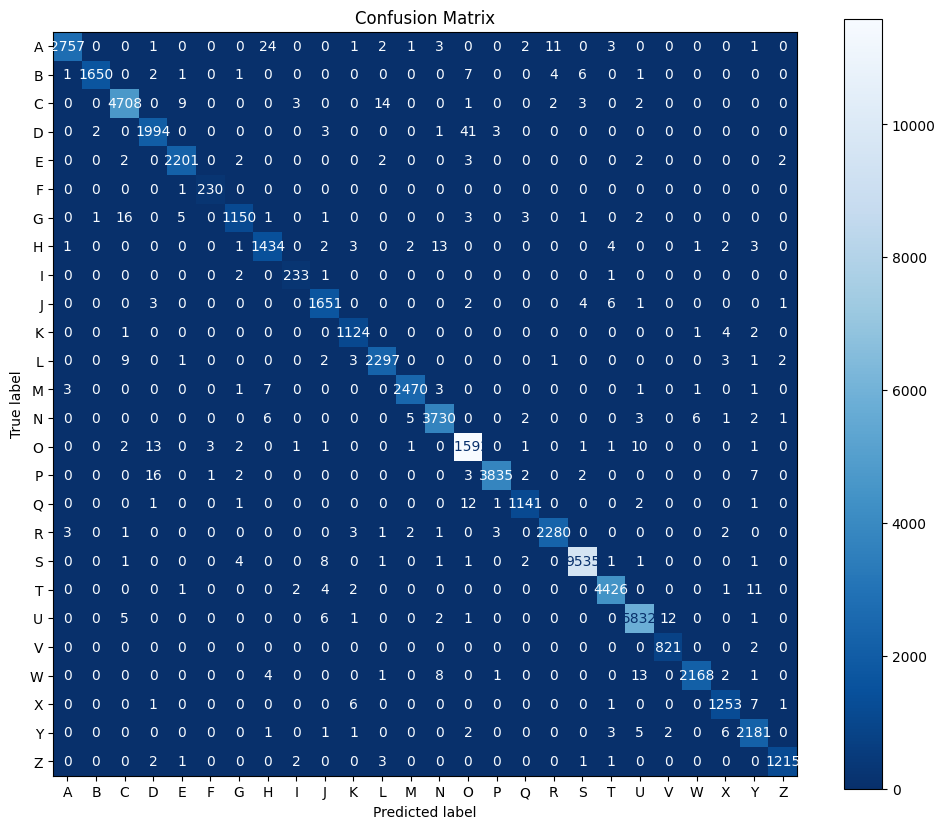

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
cm = confusion_matrix(y_test, ypred_test)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=alphabets)
fig, ax = plt.subplots(figsize=(12,10))
cmp.plot(ax=ax, cmap = "Blues_r")
plt.title("Confusion Matrix")
plt.show()

In [77]:
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2806
           1       1.00      0.99      0.99      1673
           2       0.99      0.99      0.99      4742
           3       0.98      0.98      0.98      2044
           4       0.99      0.99      0.99      2214
           5       0.98      1.00      0.99       231
           6       0.99      0.97      0.98      1183
           7       0.97      0.98      0.97      1466
           8       0.97      0.98      0.97       237
           9       0.98      0.99      0.99      1668
          10       0.98      0.99      0.99      1132
          11       0.99      0.99      0.99      2319
          12       1.00      0.99      0.99      2487
          13       0.99      0.99      0.99      3756
          14       0.99      1.00      1.00     11629
          15       1.00      0.99      0.99      3868
          16       0.99      0.98      0.99      1159
          17       0.99    

### As we can see the f1 score is good for out of sample prediction

In [80]:
def predict_image(model, img_path):
  #Read Image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28,28))
  # Plot Image
    plt.imshow(img, cmap='gray')
    plt.show()

  # preprocess x data
    img = img.astype("float32")/255
    img = np.expand_dims(img, -1)
    img = np.expand_dims(img, 0)

  # Predict
    dict_word = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}
    pred_index = np.argmax(model.predict(np.reshape(img,(1,28,28,1)))) # Get the index of the maximum probability
    pred = dict_word[pred_index] # Get the predicted class label
    max_prob = np.max(model.predict(np.reshape(img,(1,28,28,1)))) # Get the maximum probability value
    return pred, max_prob




### Out of sample prediction

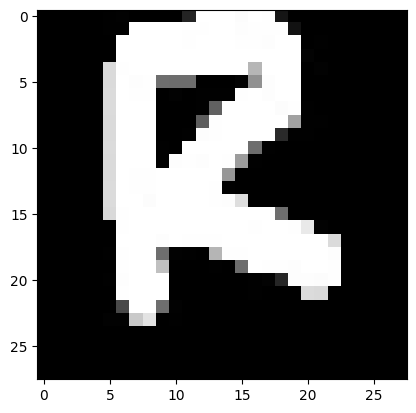

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


('R', 0.9998777)

In [81]:
predict_image(model, "/content/ImgR.jpg")